In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, sys
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from bokeh.palettes import d3
from bokeh.plotting import ColumnDataSource, figure, output_file, output_notebook, show
from bokeh.embed import components
from bokeh.io import output_file




In [2]:
sys.path.append('../src')
import utils
import settings

In [4]:
settings.interim_features_fpath

'/home/barry/projects/open-image-search/search-model/data/interim/test_set/features/features.csv'

In [4]:
labels, features_list = utils.load_features(settings.features_fpath)

In [31]:
labels[:5]

array(['../data/processed/nms/images/WhiteWatson-BrightonM_13_R.3844.42_SL_x.jpeg',
       '../data/processed/nms/images/Dudgeon-_43_G.1890.114.1888_SL.jpeg',
       '../data/processed/nms/images/Unknown-_12_G.2005.13.13_SL.jpeg',
       '../data/processed/nms/images/WhiteWatson-BrightonM_93_R.3844.122_SL_x.jpeg',
       '../data/processed/nms/images/Ghostie-_391_G.2006.13.43_SL.jpeg'],
      dtype='<U81')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 103 samples in 0.004s...
[t-SNE] Computed neighbors for 103 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 103 / 103
[t-SNE] Mean sigma: 3.738090
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.083549
[t-SNE] KL divergence after 1000 iterations: 0.584453


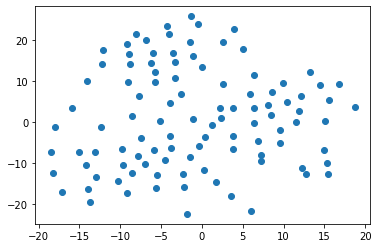

In [6]:
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features_list)
feature_list_compressed = pca.transform(features_list)

num_samples=1028
# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:num_samples]

selected_titles = [ l.split('/')[-1] for l in labels[:num_samples]]
selected_imgs = labels[:num_samples]
tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1])
plt.show()

In [46]:
settings.processed_image_dir.replace(str(settings.BASE_DIR),"")

'/data/processed/nms/images'

In [50]:
selected_imgs = np.char.replace(selected_imgs,"../data/processed/nms",".")

In [51]:
output_fldr="../plots/nms"
fname="nms_sl_sample.html"
output_fpath =  os.path.join(output_fldr, fname)

plot_title="NMS Stuck Labels Sample"

In [52]:
if not os.path.exists(output_fldr):
    os.makedirs(output_fldr)

In [53]:
source = ColumnDataSource(data=dict(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    desc=selected_titles,
    imgs=selected_imgs,
    ))

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="200" alt="@imgs"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=10, alpha=0.5, source=source)

# export to components
script, div = components(p)

output_file(output_fpath, title=plot_title)
show(p) 

# Graphical Collection

In [10]:
df_m = pd.read_csv('../data/raw/ethz/metadata/imageSearch_metadata_03.12.csv')
df_m.head()

,recordID,imageURL,invNr,person,date,title,classification,matTec,institutionIsil,recordURL,imageLicence,timestamp
0,14943,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,1916.0047.1,"Vallotton, Félix (1865 - 1925), Künstler",Enstehung des Druckträgers: 1915,"La tranchée, Blatt Nr. 1 aus ""C'est la guerre""",Druckgraphik,Holzschnitt,Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-06-25T20:22:59.957Z
1,17626,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,1916.0047.1-6,"Vallotton, Félix (1865 - 1925), Künstler, Hera...",Enstehung des Druckträgers: 1915 - 1916,C'est la guerre,Druckgraphik,Holzschnitt,Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-06-25T20:45:41.43Z
2,12789,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,1916.0047.2,"Vallotton, Félix (1865 - 1925), Künstler",Enstehung des Druckträgers: 1915,"L'orgie, Blatt Nr. 2 aus ""C'est la guerre""",Druckgraphik,Holzschnitt,Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-06-25T20:11:40.1Z
3,10098,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,1916.0047.3,"Vallotton, Félix (1865 - 1925), Künstler",Enstehung des Druckträgers: 1916,"Les fils de fer, Blatt Nr. 3 aus ""C'est la gue...",Druckgraphik,Holzschnitt,Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-06-25T19:57:32.323Z
4,10829,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,1916.0047.4,"Vallotton, Félix (1865 - 1925), Künstler",Enstehung des Druckträgers: 1916,"Dans les ténèbres, Blatt Nr. 4 aus ""C'est la g...",Druckgraphik,Holzschnitt,Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-06-25T20:01:25.563Z


In [12]:
df_m.loc[0,"imageURL"]

'https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ImageAsset&module=collection&objectId=14943&resolution=superImageResolution'

In [8]:

num_feature_dimensions=100
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features_list)
feature_list_compressed = pca.transform(features_list)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.019s...
[t-SNE] Computed neighbors for 1000 samples in 0.221s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.634830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.589447
[t-SNE] KL divergence after 1000 iterations: 1.108566


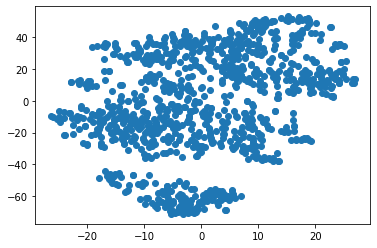

In [17]:
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features_list)
feature_list_compressed = pca.transform(features_list)

num_samples=1000
# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:num_samples]
selected_class_ids = labels[:num_samples]

tdf = df_m.loc[labels[:num_samples],:]
selected_titles = tdf['title'].to_list()
selected_colors = tdf['color_map'].to_list()

ser_img = tdf.loc[:,'img_url'].str.replace('resolution=superImageResolution','resolution=lowImageResolution')
selected_imgs = ser_img.to_list()[:num_samples]
tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1])
plt.show()

In [21]:
source = ColumnDataSource(data=dict(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    desc=selected_titles,
    imgs=selected_imgs,
    ))

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="7" alt="@imgs"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=10, color='colors', alpha=0.5, source=source)

# export to components
script, div = components(p)

show(p)

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-21-61f70c95bdbb>, line 1)

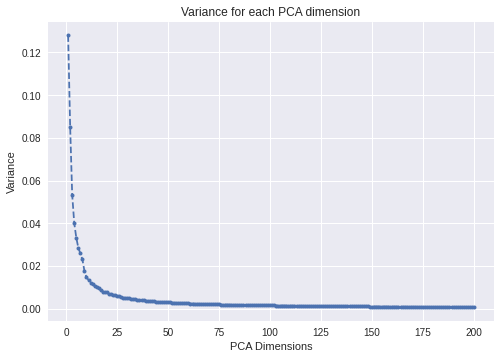

In [15]:
pca = PCA(200)
pca.fit(features_list)
plt.style.use('seaborn')
plt.plot(range(1,201),pca.explained_variance_ratio_,'o--', markersize=4)
plt.title ('Variance for each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

In [9]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [14]:
image_data = zip(xs, ys, imgs)


In [18]:
xs=tsne_results[:,0]
ys=tsne_results[:,1]
descs=selected_titles
imgs=selected_imgs

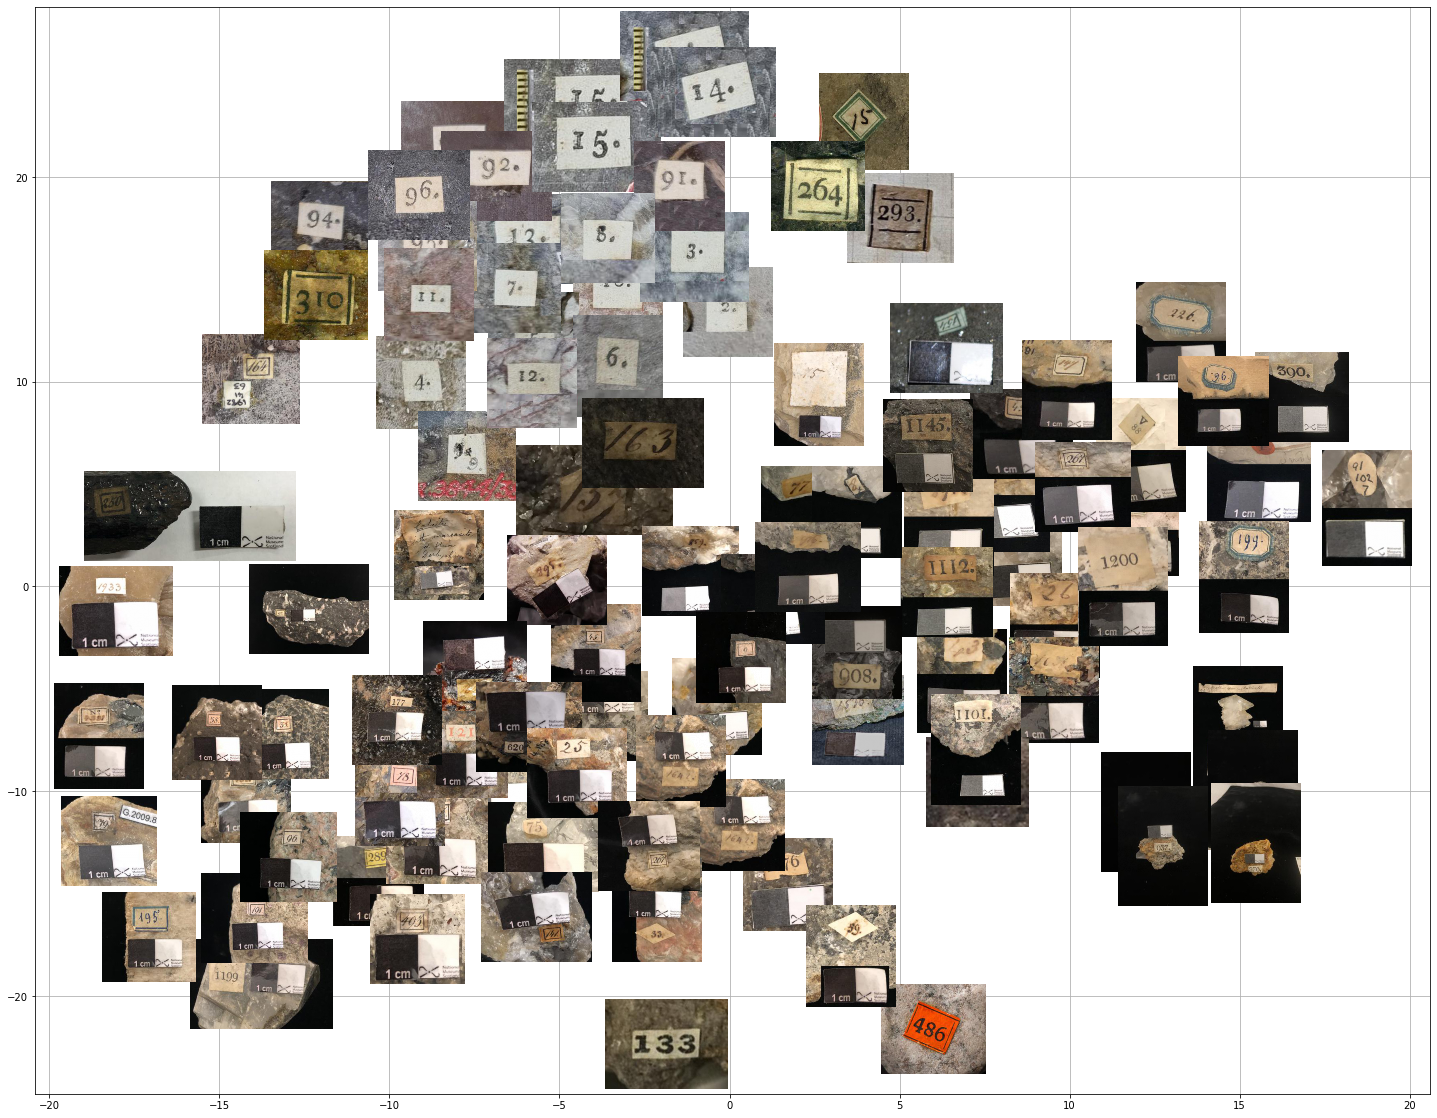

In [30]:
fig, ax = plt.subplots(figsize=(25,20))


for x, y, img_path in zip(xs, ys, imgs):
    img = mpimg.imread(img_path)
    
    imagebox = OffsetImage(img, zoom=0.4, interpolation="bicubic")
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)
    plt.scatter(x,y)
    
plt.grid()

plt.draw()
plt.savefig('../plots/nms_labels_clustering.png',bbox_inches='tight')